<span><center><h1> Best overlap between curves </h1></center></span>

# Introduction

**Given two curves $y1(x)$ and $y2(x)$ how can we find the best overlap of those two curves ?**

The notion of "best overlap" refers to the minimisation of a distance between the curves. Definin the distance is thus the first step.

In the following examples, we will take the distance between two curves as the quadratic difference.

Provided that $y1$ and $y2$ have the same number of points $N$, we define the distance as follows:

$$d(y1, y2) = \sum_{i=0}^{N-1} \left[y_1(x_i) - y_2(x_i) \right]^2 $$

Now, we supposed that the the curves are considered at the same locations $x_i$, so we will just use the index $i$ to track the value of y in a array of length $N$:

$$d(y1, y2) = \sum_{i=0}^{N-1} \left(y_{1,i} - y_{2,i} \right)^2 $$

Intuitively, finding the best overlap would just consist in making a curve "glide" horizontally while keeping the other fixed. Then, for each increment of translation, we would compute the distance and try to get the minimum among all the computed distances. This would give us the "best" overlap.

![curve_gif.gif](curve_gif.gif)

>Here I would like to mention two things:
>
>1. We may be tempted to go for a convolution product because it seems to be exactly what we are trying to do. However, as I will show later it doesn't work.
>
>2. The problem that will come quickly is how to compare the distance between two sets of curves, where both sets are of different length. We need to renormalize it, otherwise, a bad overlap between two short pieces may yield a better distance than a good yet non perfect overlap between two long pieces of curve.
>
>We will call $d_{m}$ the normalized distance and define it as follows:
>
>$$d_{m}(y1, y2) = \frac{d(y1,y2)}{N} = \frac{1}{N} \sum_{i=0}^{N-1} \left(y_{1,i} - y_{2,i} \right)^2  $$

# Import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Initial Problem

We want to retreive the horizontal shift between $y1$ and $y2$ to find the best overlap between the two curves.

We will call this shift, the offset $o$.

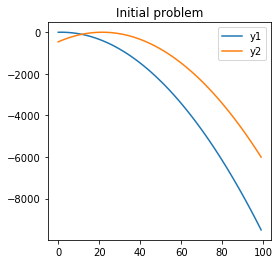

In [4]:
def shift(f, x, shift):
    return f(x-shift)

def f(x):
    return x*3 - x**2
    #return np.sin(x*np.pi/20)
    #return np.exp(x*np.pi/20)*3 

o0 = 20
x = np.arange(0,100,1)
y1 = f(x)
y2 = shift(f, x, o0)

fig = plt.figure(figsize=(4,4))
plt.plot(x, y1, label="y1")
plt.plot(x, y2, label="y2")
plt.title("Initial problem")
plt.legend()
plt.show()

# Solution

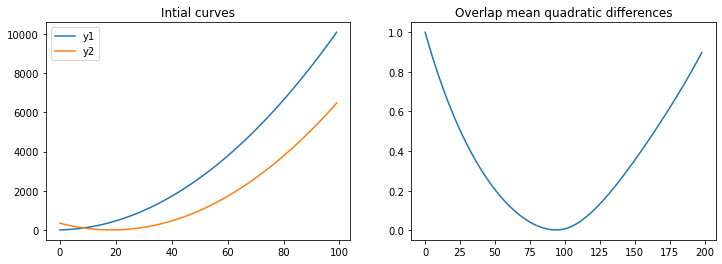

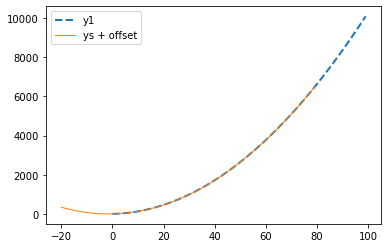

Original offset 20
Computed offset: 20


In [321]:
def overlap(y1, y2):
    """
    overlap computes the mean quadratic difference between y1 and y2
    at several overlapping positions.
    we adjust the overlaps so that there is always the same amount of points
    that are used in the averages.
    A better way would be to compute an horizontal distance as with Lebesgue
    integral. However, it is perhaps impossible numerically...
    """
    x = y1 if len(y1) >= len(y2) else y2 # long
    y = y2 if len(y1) >= len(y2) else y1 # short
    # slide short over long
    m = len(x)
    n = len(y)
    # compute overlaps
    res = [np.mean((x[:i] - y[-i:])**2) for i in range(1, n)]
    res += [np.mean((x[i:n+i] - y)**2) for i in range(0, m-n+1)]
    res += [np.mean((x[m-n+i:] - y[:n-i])**2) for i in range(1, n)]
    return np.array(res)

def get_offset(y1,y2):
    """
    this funcions returns the horzontal shift between the array y1 and y2.
    This shift is taken as the minimal average quadratic difference between
    overlapping sections of y1 and y2.
    """
    n = len(y2) if len(y2) >= len(y1) else len(y1)
    return n - np.argmin(overlap(y1,y2)) - 1

y1n = y1/np.max(y1)
y2n = y2/np.max(y2)
# it is unecessary to normalize actually.
step = 33
# we can play and select a piece of y2
imin = 0
imax = len(y2)
ys = y2[imin:imax]
# compute the overlap for plotting
op = overlap(y1n,y2n)
# compute offset to check answer
o = get_offset(y1,y2)

# first plot the initial graph 
# and the overlap mean quadratic differences.
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Intial curves")
ax1.plot(x, y1, label="y1")
ax1.plot(x, y2, label="y2")
plt.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Overlap mean quadratic differences")
ax2.plot(op)

plt.show()

# plot results
plt.plot(x, y1, label="y1", linewidth=2, linestyle="dashed")
plt.plot(x[imin:imax]-o, ys, label="ys + offset", linewidth=1)
plt.legend()
plt.show()

# print offset
print("Original offset", o0)
print("Computed offset:", o)